In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import copy

## Get Data

In [53]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
print("Total Data", len(df_kend_train))
df_kend_train.head()

Total Data 230625


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.000000,0.153846,1.0,0.634615,1.0,0.5,1.000000,0.409000,0.932099,0.301038
1,0.000000,0.430769,1.0,0.750000,0.0,1.0,0.000000,0.367431,0.172840,0.512111
2,0.459542,0.015385,1.0,0.884615,1.0,0.5,1.000000,0.496727,0.981481,0.377163
3,0.000000,0.461538,1.0,0.673077,0.0,1.0,0.495196,0.536338,0.537037,0.636678
4,0.000000,0.015385,1.0,0.673077,1.0,0.5,1.000000,0.310270,0.932099,0.557093


## Select Attribute for Clustering

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

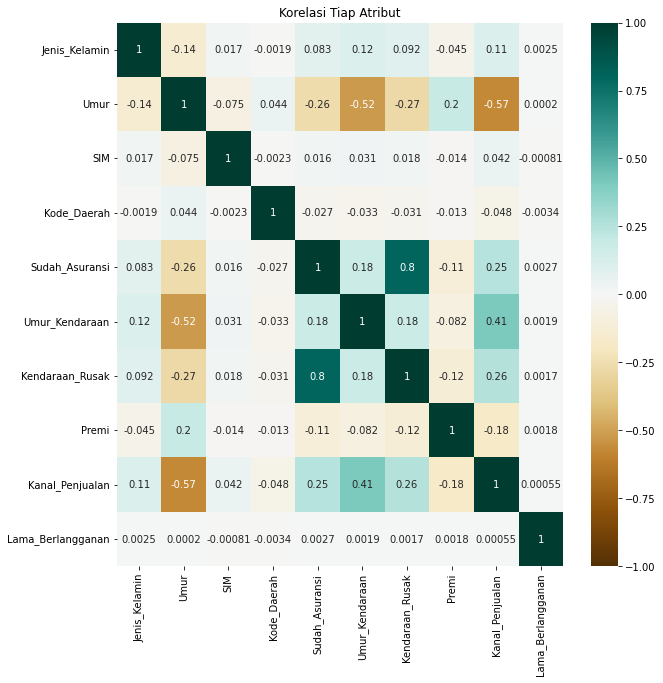

In [54]:
corr = df_kend_train.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Tiap Atribut')

In [55]:
x = 'Umur'
y = 'Kanal_Penjualan'
df_kend_train =df_kend_train[[x, y]]
# df = df_kend_train.copy()
df = copy.deepcopy(df_kend_train)
df['Cluster'] = ""
df['Color'] = ""
print(df[x][0])
df.head()

0.1538461538461538


,Umur,Kanal_Penjualan,Cluster,Color
0,0.153846,0.932099,,
1,0.430769,0.172840,,
2,0.015385,0.981481,,
3,0.461538,0.537037,,
4,0.015385,0.932099,,


## Kmeans Function

### Initiate Centroid with Random Value

In [56]:
def initialCentroid(k, x, y, df):  
  randValue = {}
  for i in range(k):
    randValue[i] = [df[x][random.randint(0, len(df))], df[y][random.randint(0, len(df))]]
  print("rand: ", randValue)
  return randValue

### Calculate Distance Using Euclidean

In [57]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, centroids):
  colors = ['blue','red','green','orange','olive','brown','pink','grey','purple','cyan','gray']
  curr = 1
  dftmp = df.copy()  
  clus = []
  color = []
  for data in df.index:    
    dist = []
    rowData = [df[x][data], df[y][data]]
    for centroid in centroids:
      dist.append(calcEuclidean(rowData, centroids[centroid]))      
    if curr < 1:
      print("dist: ",dist)                        
      curr+=1      
    clusIdx = dist.index(min(dist))
    clus.append(clusIdx)
    color.append(colors[clusIdx])    
  dftmp['Cluster'] = clus
  dftmp['Color'] = color
  return dftmp

### Set New Centroid

In [58]:
def setCentroid(centroids, x, y, df):
  for i in centroids.keys():    
    centroids[i][0] = np.mean(df.loc[df['Cluster']==i, x])
    centroids[i][1] = np.mean(df.loc[df['Cluster']==i, y])
  return centroids

### Main Function KMeans

In [59]:
def kMeans(k, x, y, df):      
  centroid = initialCentroid(k, x, y, df)  
  same = False
  i = 0    
  while(same == False):
    # old_centroid = centroid.copy()
    old_centroid = copy.deepcopy(centroid)
    cluster = {i: [] for i in range(k)}
    df = calcDist(df, centroid)    
    centroid = setCentroid(centroid, x, y, df)        
    same = False
    if (old_centroid == centroid):
      print('amsu')
      same = True    
    i+=1
  print('Perulangan ke', i-1)
  print('Hasil Akhir Cluster:')
  for key in centroid.keys():
    print(key, ': ', centroid.get(key))
  
  return centroid, cluster, df



## Main

In [60]:
# convert to array agar lebih mudah memprosesnya
data = df.to_numpy()
k = 3

centroid, cluster, df_hasil = kMeans(k, x, y, df)

rand:  {0: [0.2153846153846154, 0.1543209876543209], 1: [0.0153846153846153, 0.9320987654320988], 2: [0.6461538461538462, 0.9320987654320988]}
amsu
Perulangan ke 5
Hasil Akhir Cluster:
0 :  [0.4684625968244621, 0.1526750591583159]
1 :  [0.09611475423937159, 0.9146023931346462]
2 :  [0.46831011697368785, 0.7714725332727517]


## Proses Hasil

In [61]:
colorsPallete = ['orange', 'green', 'red', '#3980d5', '#7715d7']
# mengubah kembali ke dataframe dan menambah kolom warna untuk visualisasi nantinya
def convDf(clus):
  df_hasil = []  
  for key in clus.keys():
    for c in clus.get(key):
      df_hasil.append((c[0], c[1], key, colorsPallete[key]))
  df_hasil = pd.DataFrame(df_hasil)
  df_hasil.columns = ['Umur', 'Kanal_Penjualan', 'Cluster Ke', 'Color']
  return df_hasil
        
df_hasil

,Umur,Kanal_Penjualan,Cluster,Color
0,0.153846,0.932099,1,red
1,0.430769,0.172840,0,blue
2,0.015385,0.981481,1,red
3,0.461538,0.537037,2,green
4,0.015385,0.932099,1,red
...,...,...,...,...
230620,0.046154,0.932099,1,red
230621,0.015385,0.932099,1,red
230622,0.046154,0.932099,1,red
230623,0.738462,0.759259,2,green


## Visualisasi

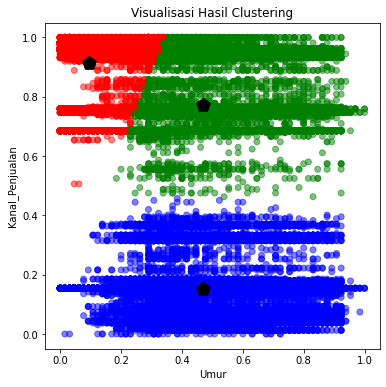

In [62]:
plt.figure(figsize=(6,6))
plt.title('Visualisasi Hasil Clustering')
plt.scatter(df_hasil['Umur'], df_hasil['Kanal_Penjualan'], color=df_hasil['Color'], alpha=0.5)
for i in range(k):
  plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p',s=200)

plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.show()


## Evaluasi Model

### Elbow Method

In [63]:
# SS_distances = []
# K = range(2, 10)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(df)
#     SS_distances.append(km.inertia_)

# plt.plot(K, SS_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

### Silhouette Analysis

In [66]:
n_clusters = [3]
for i,k in enumerate(n_clusters):        
  km = KMeans(n_clusters=k)
  predict = km.fit_predict(df_kend_train)
  score = silhouette_score(df_kend_train, predict, metric="euclidean")
  print("For ", k, "n_clusters silhouette score is ", score)

For n_clusters =  0 silhouette score is  0.6276552709337907
